## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [1]:
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [4]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

## The same function but using a for-loop instead of a vectorized operation. 
# def calculate_rmse(predictions, actuals):
#    if(len(predictions) != len(actuals)):
#        raise Exception("The amount of predictions did not equal the amount of actuals")
#    
#    diffSquared = 0
#    
#    for prediction_i, actual_i in zip(predictions, actuals):
#        diffSquared += (prediction_i - actual_i)**2
#        
#    return (diffSquared/len(actuals))**(1/2)

In [5]:
pokemons = pd.read_csv('../Pokemon.csv')
pokemons.dropna(axis=0, inplace= True)

In [6]:
pokemons_train, pokemons_test = train_test_split(pokemons, test_size = 0.3, stratify=pokemons['Type 1'], random_state=42)
print(pokemons_train.shape, pokemons_test.shape)

(289, 13) (125, 13)


In [11]:
features= ['Speed']
dt_regression = DecisionTreeRegressor(max_depth = 100) # Increase max_depth to see effect in the plot
dt_regression.fit(pokemons_train[features], pokemons_train['Defense'])

DecisionTreeRegressor(max_depth=100)

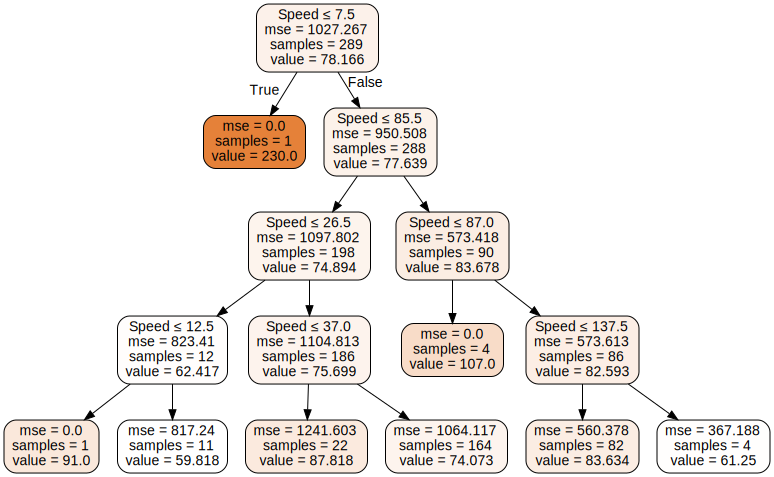

In [10]:
plot_tree_regression(dt_regression, features)